## 분류 성능평가 지표

- metrixs 서브패키지
- confusion_matrix(answer , prediction)
- accuracy_score()
- precision_score()
- recall_score()
- f1_score()
- classification_report()
- roc_curve()
- auc()

In [25]:
y_test = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]


for i in range(len(y_test)):
    TP = TN =FP =FN =0
    # TP 
    if y_test[i] == 1 and y_pred[i] == 1:
        tp += 1 
    # TN 
    if y_test[i] == 0 and y_pred[i] == 0:
        tn += 1 
    # FP 
    if y_test[i] == 0 and y_pred[i] == 1:
        fp += 1 
    # FN 
    if y_test[i] == 1 and y_pred[i] == 0:
        fn += 1 

In [ ]:
# Accuracy
(TP+TN)/(TP+TN+FP+FN)
# Recall - 재현율
(TP)/(TP+FN)
# Precision - 정밀도
(TP)/(TP+FP)
#F1 score -> 조화평균..?
2*(precision*recall)/(precision+recall)

# Fall out(위 양성율) - 값이 낮아야 좋은 모형
# 실제 양성클래스에 속하지 않는 표본 중에 양성클래스에 속한다고 예측한 표본의 비율
# EX) 거래 - 실제 정상거래인데 사기 거래 예측한 거래의 비율(False Positive Rate)
(FP)/(FP+TN)


In [1]:
from sklearn.metrics import confusion_matrix

y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]

In [2]:
# 분류결과표
confusion_matrix(y_true,y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [ ]:
# 이진 분류표
# 제품을 생산하는 제조공장에서 품질 테스트를 실시하여 불량품을 찾아내고 
# 불량품을 공장으로 돌려보낸다(recall)
# 품질 테스트의 결과가 양성 -> 불량품 예측한 것이고
# 품질 테스트의 결과가 음성 -> 정상 제품 의미

# TP : 불량품을 불량품으로 정확하게 예측
# TN : 정상제품을 정상상품으로 정확하게 예측
# FP : 정상제품을 불량품으로 잘못 예측
# FN : 불량품을 정상제품이라고 잘못 예측

                #사기예측             #사기예측 x

# 불량품을         TP                     FN

# 정상제품         FP                    TN

In [4]:
y_true = [1,0,1,1,0,1]
y_pred = [0,0,1,1,0,1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
### fit() 메서드는 아무 것도 수행하지 않고, predict()는 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 분류기 생성
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred

In [21]:
titanic = pd.read_csv('./data/titanic_train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
titanic_label= titanic['Survived']
print(titanic_label)
titanic_feature_df = titanic.drop(['Survived'],axis=1)
print(titanic_feature_df.head())

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0    

In [23]:
## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [35]:
titanic_feature_df = transform_features(titanic_feature_df)
titanic_feature_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [36]:
X_train, X_test, y_train, y_test = train_test_split(titanic_feature_df,
                                                    titanic_label,
                                                   test_size = .2,
                                                   random_state=10)

In [13]:
dummy_model = MyDummyClassifier()

In [14]:
dummy_model.fit(X_train,y_train)

In [15]:
y_pred = dummy_model.predict(X_test)
print('accuracy {}'.format(accuracy_score(y_test,y_pred)))

accuracy 0.3463687150837989


- 업무 특성에 따라서 특정지표를 활용해야한다
- Recall -> 암, 사기판정 / Precision(정밀도) -> 스팸메일 분류
- recall_score()/precision_score()

In [16]:
from sklearn.metrics import recall_score,precision_score

In [32]:
def display_eval(y_test,y_pred):
    confusion = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    print()
    print(confusion)
    print('*'*50)
    print()
    print('정확도 : {} , 정밀도 : {} , 재현율 : {}'.format(accuracy,precision,recall))

In [37]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
prediction = lr_model.predict(X_test)
display_eval(y_test, prediction)


[[101  16]
 [ 15  47]]
**************************************************

정확도 : 0.8268156424581006 , 정밀도 : 0.746031746031746 , 재현율 : 0.7580645161290323


In [34]:
print('accuracy : ' , (101+47) / (101+15+16+47))
print('recall : ' , (47 / (47+15))) # 47 -> TP 101 -> TF
print('precision : ' , (47 / (47+16)))

accuracy :  0.8268156424581006
recall :  0.7580645161290323
precision :  0.746031746031746


In [2]:
# [실습] - 유방암 관련 데이터 - 정확, 재현율이 중요하다(실제 P를 N으로 예측하면 안되는경우)
# 재현율은 실제 양성을 양성으로 예측한 비율이므로 높을수록 좋은 성능모형이라고 판단 할 수 있다.

from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# 데이터 프레임으로 구조를 변경해서 확인해 보기 

cancer_df = pd.DataFrame(data = cancer.data,
                        columns=cancer.feature_names)
cancer_df['target'] = cancer.target
display(cancer_df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [156]:
# # 분류학습기 생성
# # 학습 및 평가(교차 검증)
# # 평가지표에 대한 평균값을 구하기

# # 랜덤포레스트
# rf_clf = RandomForestClassifier()

# X_train, X_test, y_train, y_test = train_test_split(cancer_df.iloc[:,:-1],
#                                                     cancer_df.loc[:,'target'],
#                                                    test_size = .2,
#                                                    random_state=11)

# # accuracy, precision, recall
# rf_clf.fit(X_train,y_train)
# prediction = rf_clf.predict(X_test)
# display_eval(y_test, prediction)

In [157]:
# # 로지스틱
# # 랜덤포레스트
# lf_clf =  LogisticRegression()

# X_train, X_test, y_train, y_test = train_test_split(cancer_df.iloc[:,:-1],
#                                                     cancer_df.loc[:,'target'],
#                                                    test_size = .2,
#                                                    random_state=11)

# # accuracy, precision, recall
# lf_clf.fit(X_train,y_train)
# prediction = lf_clf.predict(X_test)
# display_eval(y_test, prediction)

In [158]:
# # 결정트리
# dt_clf = DecisionTreeClassifier()

# X_train, X_test, y_train, y_test = train_test_split(cancer_df.iloc[:,:-1],
#                                                     cancer_df.loc[:,'target'],
#                                                    test_size = .2,
#                                                    random_state=11)

# # accuracy, precision, recall
# dt_clf.fit(X_train,y_train)
# prediction = dt_clf.predict(X_test)
# display_eval(y_test, prediction)

In [6]:
# 학습기 생성
rf_model = RandomForestClassifier()

# 데이터 분리
label=cancer_df['target']
features=cancer_df.drop(columns=['target'],axis=1)

In [14]:
from sklearn.model_selection import cross_validate , KFold
from sklearn.metrics import make_scorer , f1_score

# 학습 및 평가 (교차 검증)
fold = KFold(n_splits=20 , 
             random_state=1,
             shuffle=True)

scoring = {
        'accuracy'  :  make_scorer(accuracy_score) ,
        'precision' :  make_scorer(precision_score),
        'recall'    :  make_scorer(recall_score) , 
        'f1_score'  :  make_scorer(f1_score)
 }

result = cross_validate(rf_model , features , label , cv=fold , scoring=scoring)

print(result.keys())

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score'])


In [15]:
# 평가지표에 대한 평균값을 구하기
print('accuracy',np.round(result['test_accuracy'].mean(),2))
print('precision',np.round(result['test_precision'].mean(),2))
print('recall',np.round(result['test_recall'].mean(),2))
print('f1_score',np.round(result['test_f1_score'].mean(),2))

accuracy 0.96
precision 0.97
recall 0.97
f1_score 0.97


In [18]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.2)



from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

random_forest = RandomForestClassifier(random_state=123)


params = {
    'n_estimators' : [200, 300],
    'max_features' : [8, 10],
    'max_depth'    : [4, 6]
}


Grid_rf = GridSearchCV(random_forest, 
                       param_grid = params,
                       cv         = 3,
                       scoring    = 'recall')

Grid_rf.fit(X_train, y_train)
print(Grid_rf.best_params_)
print(Grid_rf.best_score_)

# {'max_depth': 4, 'max_features': 8, 'n_estimators': 200}
# 0.9669922669922671


# test set 예측

y_pred = Grid_rf.best_estimator_.predict(X_test)
# 모델성능평가 함수
def display_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('accuracy' , accuracy)
    print('precision' , precision)
    print('recall' , recall)


{'max_depth': 4, 'max_features': 8, 'n_estimators': 200}
0.9759450171821306


In [20]:
display_eval(y_test, y_pred)

accuracy 0.9385964912280702
precision 0.927536231884058
recall 0.9696969696969697


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

### precision / recall trade Off
- predict_proba() : 예측레이블의 확률을 반환해 주는 함수

In [45]:
# titanic LogisticRegression 했던 모델을 가지고 테스트하는 코드
pred_pro_result=lr_model.predict_proba(X_test)
print('shape' , pred_pro_result.shape)
print('result\n' , pred_pro_result[:5]) # 2차원

print("*"*50)

y_pred = lr_model.predict(X_test) # 타입은 Series
print(y_pred)

result = np.concatenate([pred_pro_result,y_pred.reshape(-1,1)],axis=1) #결합함수
print('확률에 따른 예측 결과\n',result[:5])

shape (179, 2)
result
 [[0.9063371  0.0936629 ]
 [0.85361343 0.14638657]
 [0.8770825  0.1229175 ]
 [0.07335314 0.92664686]
 [0.10649675 0.89350325]]
**************************************************
[0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1]
확률에 따른 예측 결과
 [[0.9063371  0.0936629  0.        ]
 [0.85361343 0.14638657 0.        ]
 [0.8770825  0.1229175  0.        ]
 [0.07335314 0.92664686 1.        ]
 [0.10649675 0.89350325 1.        ]]


- Binarizer 클래스 fit_transform()

In [52]:
from sklearn.preprocessing import Binarizer

user_threshold = 0.4 
#pred_pro_result[:,1]
positive_pred_proba=pred_pro_result[:,1].reshape(-1,1)
# positive_pred_proba # positive 확률 값

user_predict = Binarizer(threshold=user_threshold).fit(positive_pred_proba).transform(positive_pred_proba)
display_eval(y_test,user_predict)


[[95 22]
 [13 49]]
**************************************************

정확도 : 0.8044692737430168 , 정밀도 : 0.6901408450704225 , 재현율 : 0.7903225806451613


- 임계값(threshold)이 낮아지면 재현율은 높아지고 정밀도가 감소하는 모습을 확인할 수 있다
- precision_recall_curve(정답, 예측확률값) : 정밀도, 재현율 값을 리턴시켜준다


In [70]:
from sklearn.metrics import precision_recall_curve


# 레이블 값이 1일 때의 에측확률을 추출
pred_positive_label = lr_model.predict_proba(X_test)[:,1]
# print(pred_positive_label)
precisions, recalls , thresholds = precision_recall_curve(y_test,pred_positive_label)
# print('precisions : ',precisions)
# print('recalls : ',recalls)
#print('thresholds : ',thresholds)
print(thresholds.shape[0])

162


- 시각화(정밀도, 재현율이 임계값 변화에 따른 시각화)

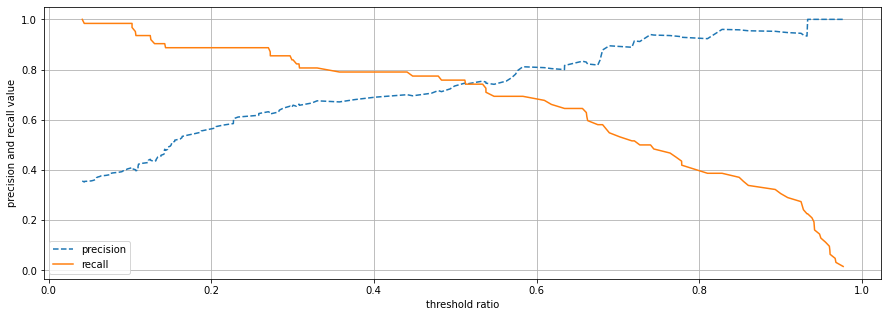

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

precisions, recalls , thresholds = precision_recall_curve(y_test,pred_positive_label)

plt.figure(figsize=(15,5))

plt.plot(thresholds,precisions[0:thresholds.shape[0]],linestyle='--',label='precision')
plt.plot(thresholds,recalls[0:thresholds.shape[0]],label = 'recall')

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')
plt.legend()
plt.grid()
plt.show()

- 타이타닉을 이용한 생존자 예측 FPR, TPR, 임계값
- roc_curve(실제값, 예측확률 값) : FPR, TPR 임계값

In [81]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_positive_label = lr_model.predict_proba(X_test)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)

print('샘플추출')
print()
thr_idx = np.arange(1, thresholds.shape[0],6)
print('thr idx : ' ,thr_idx)
print('thr threshold value : ' ,thresholds[thr_idx])
print()
print('fprs value : ' ,fprs[thr_idx])
print()
print('tprs value : ' ,tprs[thr_idx]) # tpr - 재현율
print()

샘플추출

thr idx :  [ 1  7 13 19 25 31 37 43 49 55]
thr threshold value :  [0.97700543 0.72698861 0.65646883 0.51186991 0.33029724 0.29699824
 0.18758847 0.1250837  0.1100613  0.02695786]

fprs value :  [0.         0.02564103 0.06837607 0.13675214 0.20512821 0.23931624
 0.37606838 0.62393162 0.72649573 1.        ]

tprs value :  [0.01612903 0.5        0.64516129 0.75806452 0.80645161 0.85483871
 0.88709677 0.93548387 0.93548387 1.        ]



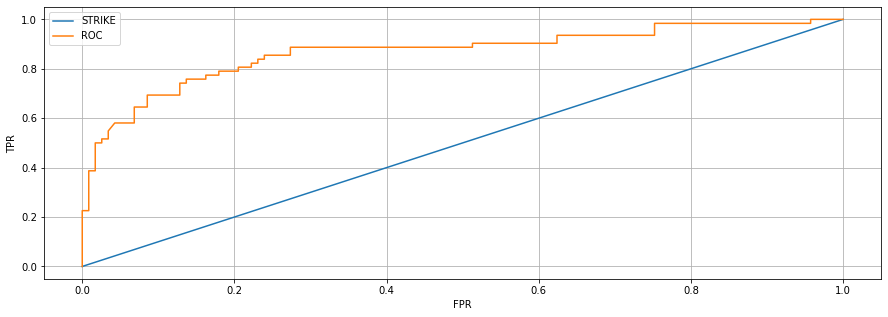

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

pred_positive_label = lr_model.predict_proba(X_test)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_positive_label)


plt.figure(figsize=(15,5))

#대각선
plt.plot([0,1],[0,1],label='STRIKE')

#ROC
plt.plot(fprs,tprs,label='ROC')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
prediction = lr_model.predict(X_test)
print('roc auc value {}'.format(roc_auc_score(y_test,prediction)))

roc auc value 0.8106561896884479
